# Creating training set

This notebooks generates series of 32x32x32 volumes of both image and mask data of vesicles to create a training set for machine learning. 

In [2]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage.io as io

from skimage.morphology import label as label
from skimage.measure import regionprops as regprop
from skimage.morphology import disk, binary_dilation

import mrcfile

In [12]:
# #define location of data
# server_path = '/Volumes/synaptosome/pyto/tomo/'
# server_path = '/mnt/data/amin/Data/tomo/'
# #define location where to save the training data 
# folder_to_save = '/Users/gw18g940/Desktop/Test_data/Zuber/multi_set_training/'
# folder_to_save = '/mnt/data/amin/Data/train_dataset_nonad/'

In [13]:
server_path = '/mnt/data/amin/Handpicked/'
folder_to_save = '/mnt/data/amin/Data/train_dataset/'

In [16]:
#find all folders containing data
# folders = glob.glob(server_path+'*ctrl*')
folders = glob.glob(server_path+'*')

In [17]:
folders

['/mnt/data/amin/Handpicked/133',
 '/mnt/data/amin/Handpicked/123',
 '/mnt/data/amin/Handpicked/84',
 '/mnt/data/amin/Handpicked/134',
 '/mnt/data/amin/Handpicked/115',
 '/mnt/data/amin/Handpicked/102',
 '/mnt/data/amin/Handpicked/80',
 '/mnt/data/amin/Handpicked/114',
 '/mnt/data/amin/Handpicked/132',
 '/mnt/data/amin/Handpicked/73',
 '/mnt/data/amin/Handpicked/128',
 '/mnt/data/amin/Handpicked/116']

/mnt/data/amin/Handpicked/133
0
/mnt/data/amin/Handpicked/133/Dummy_133_trim.rec.nad


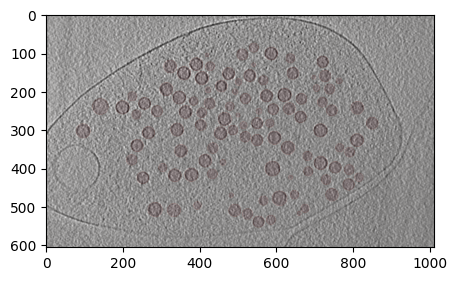

/tmp/ipykernel_98757/3641436115.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image[z:z+64, x:x+64,y:y+64].astype(np.float))
/tmp/ipykernel_98757/3641436115.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[z:z+64, x:x+64,y:y+64].astype(np.float))


/mnt/data/amin/Handpicked/123
248
/mnt/data/amin/Handpicked/123/Dummy_123_trim.rec.nad


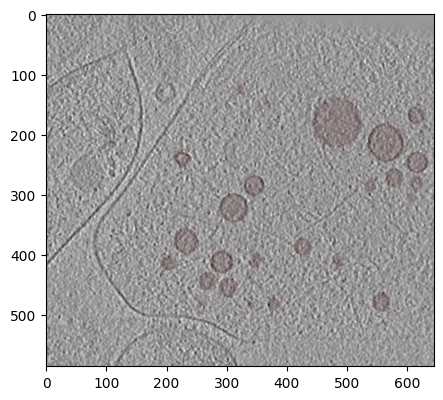

/mnt/data/amin/Handpicked/84
296
/mnt/data/amin/Handpicked/84/Dummy_84_trim.rec.nad


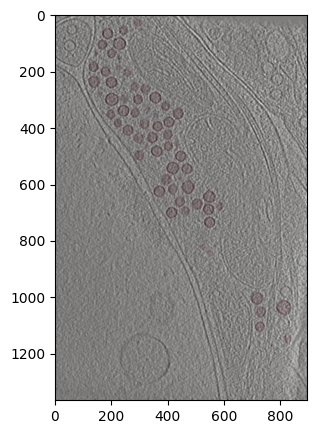

/mnt/data/amin/Handpicked/134
579
/mnt/data/amin/Handpicked/134/Dummy_134_trim.rec.nad


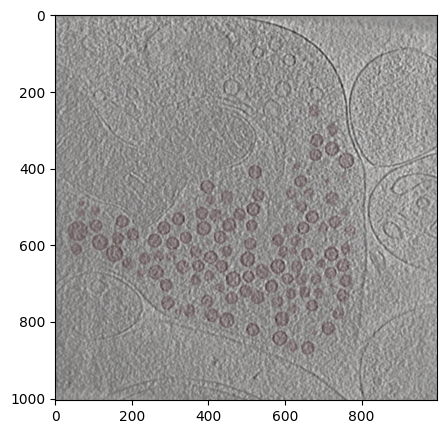

/mnt/data/amin/Handpicked/115
845
/mnt/data/amin/Handpicked/115/Dummy_115_trim.rec.nad


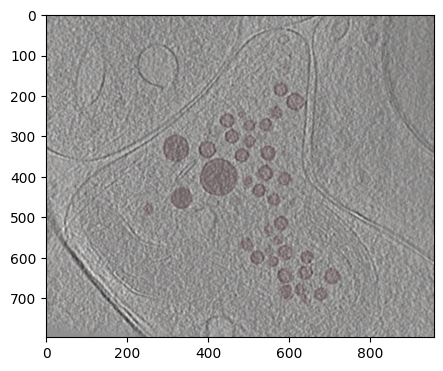

/mnt/data/amin/Handpicked/102
952
/mnt/data/amin/Handpicked/102/Dummy_102_trim_n20.rec.nad


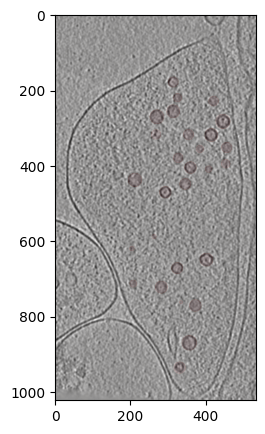

/mnt/data/amin/Handpicked/80
1047
/mnt/data/amin/Handpicked/80/Dummy_80_trim.rec.nad


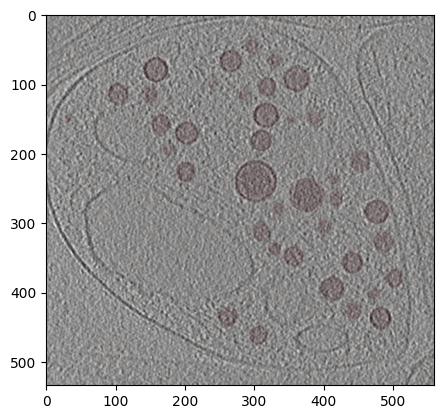

/mnt/data/amin/Handpicked/114
1111
/mnt/data/amin/Handpicked/114/Dummy_114_trim.rec.nad


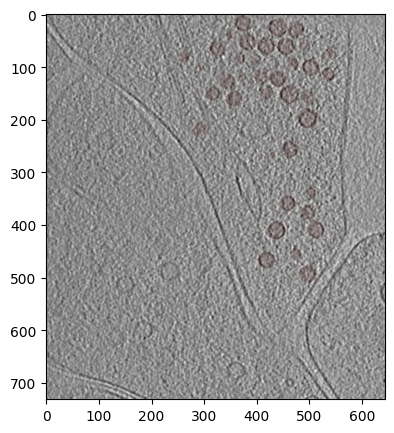

/mnt/data/amin/Handpicked/132
1171
/mnt/data/amin/Handpicked/132/Dummy_132_trim.rec.nad


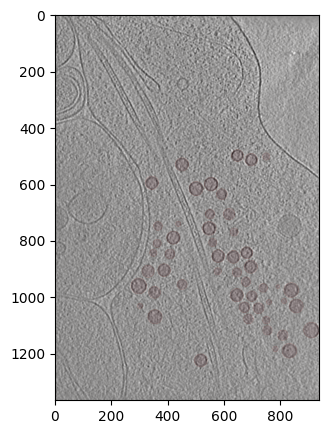

/mnt/data/amin/Handpicked/73
1361
/mnt/data/amin/Handpicked/73/Dummy_73_trim.rec.nad


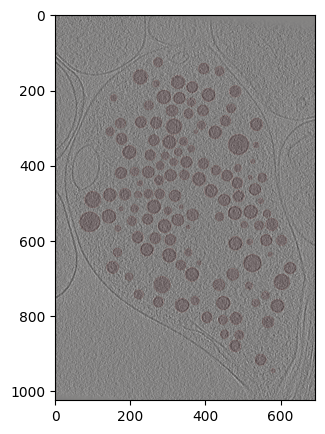

/mnt/data/amin/Handpicked/128
1594
/mnt/data/amin/Handpicked/128/Dummy_128_trim.rec.nad


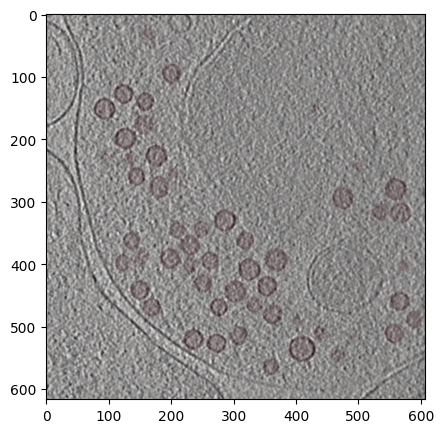

/mnt/data/amin/Handpicked/116
1720
/mnt/data/amin/Handpicked/116/Dummy_116_trim.rec.nad


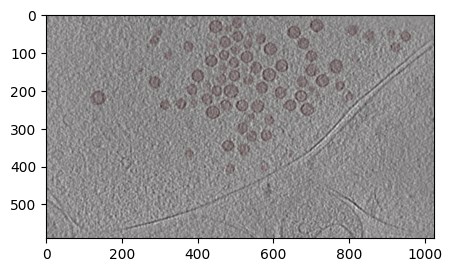

In [20]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
for f in folders:
    
    print(f)
    if os.path.exists(f+'/labels_out.mrc'):
        print(ind)
        print(glob.glob(f+'/*.rec.nad')[0])
        
        imagefile = mrcfile.open(glob.glob(f+'/*.rec.nad')[0])
        maskfile = mrcfile.open(f+'/labels_out.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        fig, ax = plt.subplots(figsize=(5,5))
        plt.imshow(image[100,:,:],cmap = 'gray')
        plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        for z in np.arange(0,image.shape[0]-64,64):
            for x in np.arange(0,image.shape[1]-64,64):
                for y in np.arange(0,image.shape[2]-64,64):
                    if np.sum(mask[z:z+64,x:x+64,y:y+64])>8000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+64, x:x+64,y:y+64].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+64, x:x+64,y:y+64].astype(np.float))
                        ind+=1

/mnt/data/amin/Data/tomo/spray_ctrl_2
0
/mnt/data/amin/Data/tomo/spray_ctrl_2/03.rec


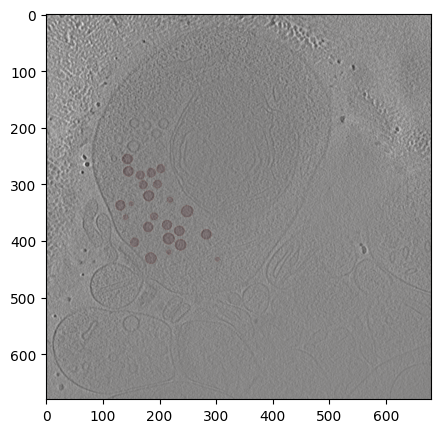

/tmp/ipykernel_89301/3718349190.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image[z:z+32, x:x+32,y:y+32].astype(np.float))
/tmp/ipykernel_89301/3718349190.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[z:z+32, x:x+32,y:y+32].astype(np.float))


/mnt/data/amin/Data/tomo/spray_ctrl_3
74
/mnt/data/amin/Data/tomo/spray_ctrl_3/ok.rec


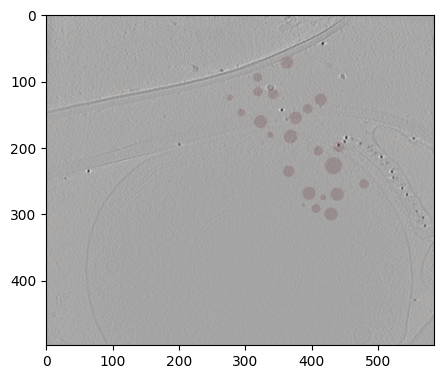

/mnt/data/amin/Data/tomo/spray_ctrl_5
198
/mnt/data/amin/Data/tomo/spray_ctrl_5/ok.rec


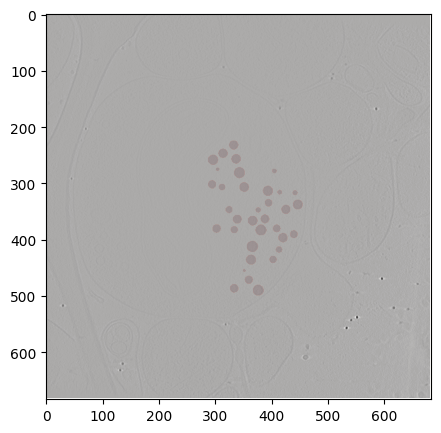

/mnt/data/amin/Data/tomo/spray_ctrl_9
342
/mnt/data/amin/Data/tomo/spray_ctrl_9/5.rec


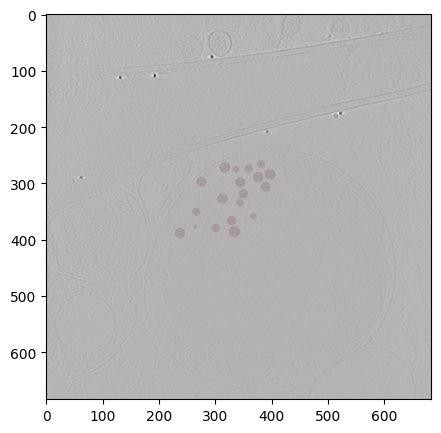

/mnt/data/amin/Data/tomo/spray_ctrl_6
453
/mnt/data/amin/Data/tomo/spray_ctrl_6/ok.rec


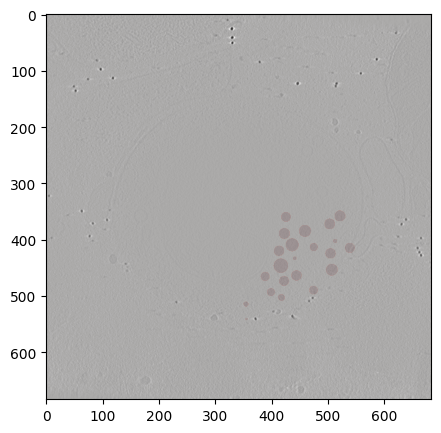

/mnt/data/amin/Data/tomo/spray_ctrl_1
562
/mnt/data/amin/Data/tomo/spray_ctrl_1/6.rec


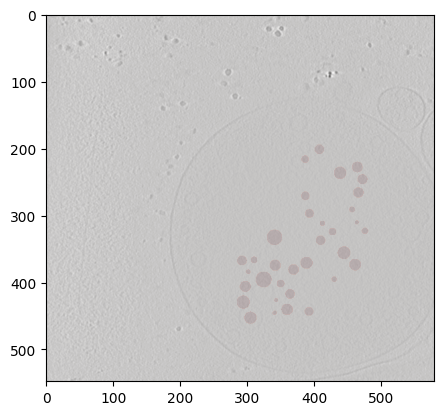

/mnt/data/amin/Data/tomo/spray_ctrl_8
752
/mnt/data/amin/Data/tomo/spray_ctrl_8/4.rec


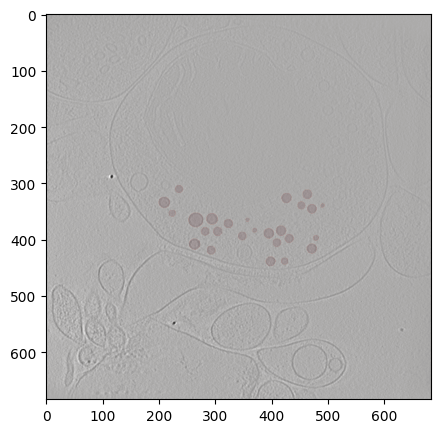

/mnt/data/amin/Data/tomo/spray_ctrl_4
874
/mnt/data/amin/Data/tomo/spray_ctrl_4/ok.rec


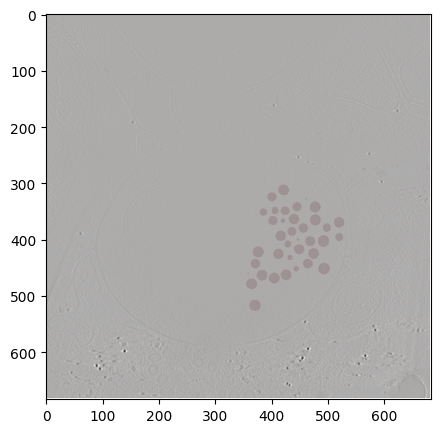

/mnt/data/amin/Data/tomo/spray_ctrl_7
974
/mnt/data/amin/Data/tomo/spray_ctrl_7/04.rec


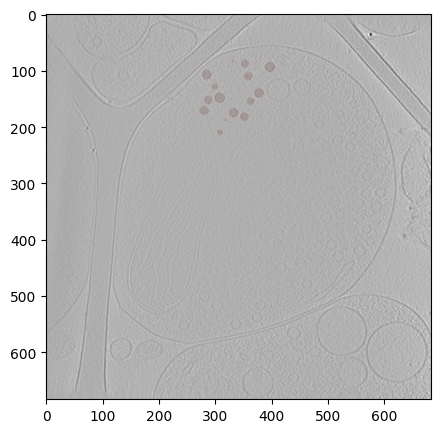

In [5]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
for f in folders:
    
    print(f)
    if os.path.exists(f+'/labels-16bit.mrc'):
        print(ind)
        print(glob.glob(f+'/*.rec')[0])
        
        imagefile = mrcfile.open(glob.glob(f+'/*.rec')[0])
        maskfile = mrcfile.open(f+'/labels-16bit.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        fig, ax = plt.subplots(figsize=(5,5))
        plt.imshow(image[100,:,:],cmap = 'gray')
        plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        for z in np.arange(0,image.shape[0]-32,32):
            for x in np.arange(0,image.shape[1]-32,32):
                for y in np.arange(0,image.shape[2]-32,32):
                    if np.sum(mask[z:z+32,x:x+32,y:y+32])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+32, x:x+32,y:y+32].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+32, x:x+32,y:y+32].astype(np.float))
                        ind+=1

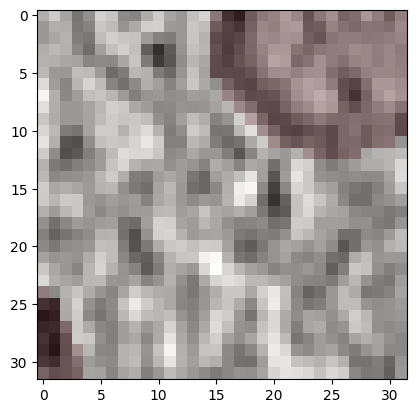

In [11]:
index = 2

image = np.load(folder_to_save+'image_'+str(index)+'.npy')
mask = np.load(folder_to_save+'mask_'+str(index)+'.npy')
plt.imshow(image[25,:,:], cmap = 'gray')
plt.imshow(mask[25,:,:], cmap = 'Reds', alpha = 0.2)
plt.show()


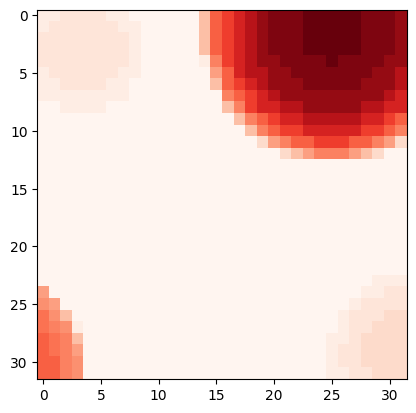

In [12]:
plt.imshow(np.sum(mask[:,:,:],axis = 0), cmap = 'Reds')
plt.show()
